# Employee Attrition

## Import Required Libraries

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

##Import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the data dictionary
dd = pd.read_excel('/content/drive/MyDrive/Employee Attrition Analysis/data_dictionary.xlsx')

# Read in the general employee data
gen = pd.read_csv('/content/drive/MyDrive/Employee Attrition Analysis/general_data.csv')

# Read in the employee survey data
es = pd.read_csv('/content/drive/MyDrive/Employee Attrition Analysis/employee_survey_data.csv')

# Read in the manager survey data
ms = pd.read_csv('/content/drive/MyDrive/Employee Attrition Analysis/manager_survey_data.csv')

# Read in the employee in-time data
it = pd.read_csv('/content/drive/MyDrive/Employee Attrition Analysis/in_time.csv')

# Read in the employee out-time data
ot = pd.read_csv('/content/drive/MyDrive/Employee Attrition Analysis/out_time.csv')

## Visualize the data

In [4]:
# Adjust Pandas display options to show all columns
pd.set_option('display.max_columns', None)  # None for unlimited columns
pd.set_option('display.max_rows', None)  # None for unlimited rows

In [5]:
# Display the head of each dataframe for visualization

print("\nGeneral Employee Data")
display(gen.head())

print("\nEmployee Survey Data")
display(es.head())

print("\nManager Survey Data")
display(ms.head())

print("\nIn-Time Data")
display(it.head())

print("\nOut-Time Data")
display(ot.head())


General Employee Data


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4



Employee Survey Data


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0



Manager Survey Data


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3



In-Time Data


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2


Out-Time Data


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

### Alignment of In-Time and Out-Time Data with Employee Data

To ensure seamless integration and alignment with other employee data, the first column in both the In-Time and Out-Time datasets will be renamed as `EmployeeID`. This renaming is essential for matching entries across various datasets consistently, facilitating comprehensive analysis of employee attendance and work patterns.

In [6]:
# Rename the first column of In-Time Data to 'EmployeeID'
it.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

# Rename the first column of Out-Time Data to 'EmployeeID'
ot.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

# Display the first few rows of the updated In-Time Data to verify
print("Updated In-Time Data:")
display(it.head())

# Display the first few rows of the updated Out-Time Data to verify
print("\nUpdated Out-Time Data:")
display(ot.head())

Updated In-Time Data:


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2


Updated Out-Time Data:


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

## Data Overview

In [7]:
# Display information summary for each dataframe

print("\nGeneral Employee Data")
display(gen.info())

print("\nEmployee Survey Data")
display(es.info())

print("\nManager Survey Data")
display(ms.info())

print("\nIn-Time Data")
display(it.info())

print("\nOut-Time Data")
display(ot.info())


General Employee Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

None


Employee Survey Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


None


Manager Survey Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


None


In-Time Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


None


Out-Time Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


None

### Calculating Average Hours Worked and Days Worked

In this section, calculations will be performed for:
- **Average Hours Worked per Day**: Average daily work hours for each employee.
- **Number of Days Worked**: Total workdays per employee, accounting for any leaves taken.

In [8]:
# Convert all columns except EmployeeID to datetime
for col in it.columns[1:]:
    it[col] = pd.to_datetime(it[col], errors='coerce')

for col in ot.columns[1:]:
    ot[col] = pd.to_datetime(ot[col], errors='coerce')

# Calculate the total hours worked each day, handling NaT values properly
hours_worked = (ot.iloc[:, 1:] - it.iloc[:, 1:]).apply(lambda x: x.dt.total_seconds() / 3600, axis=1)

# Add EmployeeID back to the hours_worked dataframe
hours_worked.insert(0, 'EmployeeID', it['EmployeeID'])

# Calculate average hours worked per day, handling NaN values properly
hours_worked['AverageHoursPerDay'] = hours_worked.iloc[:, 1:].mean(axis=1, skipna=True)

# Calculate the number of days worked
hours_worked['DaysWorked'] = hours_worked.iloc[:, 1:].notna().sum(axis=1)

# Save the summarized data
hours_summary = hours_worked[['EmployeeID', 'AverageHoursPerDay', 'DaysWorked']]

# Display the head of the summarized hours worked dataframe
print("\nSummarized Hours Worked Data")
display(hours_summary.head())


Summarized Hours Worked Data


,EmployeeID,AverageHoursPerDay,DaysWorked
0,1,7.373651,233
1,2,7.718969,237
2,3,7.013240,243
3,4,7.193678,236
4,5,8.006175,246


### Merging Survey and Hour Summary Data

Merging Employee Survey Data (es), Manager Survey Data (ms), and Hour Summary Data with General Employee Data (gen) based on EmployeeID to analyze factors influencing employee attrition.

- **Importance of Employee Survey Data (es)**:
  - Provides insights into environment satisfaction, job satisfaction, and work-life balance, directly influencing employee morale and retention.

- **Importance of Manager Survey Data (ms)**:
  - Offers data on job involvement and performance ratings, reflecting managerial effectiveness and its impact on team dynamics and employee satisfaction.

- **Importance of Hour Summary Data**:
  - Integrates average hours worked per day and the number of days worked with General Employee Data (gen) to provide a more comprehensive analysis of employee behavior and productivity.

By integrating these datasets with General Employee Data (gen), one can expect to gain actionable insights aimed at improving employee engagement, retention strategies, and overall organizational effectiveness.

In [9]:
# Merge Employee Survey Data (es) with General Employee Data (gen)
df = pd.merge(gen, es, on='EmployeeID', how='left')

# Merge Manager Survey Data (ms) with the resulting data
df = pd.merge(df, ms, on='EmployeeID', how='left')

# Merge Hour Summary Data with the resulting data
df = pd.merge(df, hours_summary, on='EmployeeID', how='left')

# Copy of the original dataframe
original_df = df.copy()

# Display the first few rows of the merged data to verify
print("Merged Data (df):")
display(df.head())

Merged Data (df):


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AverageHoursPerDay,DaysWorked
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,7.373651,233
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.718969,237
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,7.013240,243
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,7.193678,236
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,8.006175,246


## Exploratory Data Analysis

In [10]:
# Display basic information about the dataframe
info_summary = pd.DataFrame({
    'Column': list(df.columns),
    'Non-Null Count': [df[col].count() for col in df.columns],
    'Null Count': [df[col].isnull().sum() for col in df.columns],
    'Dtype': [df[col].dtype for col in df.columns]
})
print("\nDataFrame Info:")
display(info_summary)

# Display summary statistics of the dataframe
describe_table = df.describe()
print("\nDataFrame Description:")
display(describe_table)

# Get unique values in the object type columns
unique_values = {col: tuple(df[col].unique()) for col in df.select_dtypes(include='object').columns}
unique_values_table = pd.DataFrame([(col, unique_values[col]) for col in unique_values], columns=['Column', 'Unique Values'])
print("\nDataframe Unique Values:")
display(unique_values_table)

# Displaying the counts in a table format
attrition_counts = df['Attrition'].value_counts().reset_index()
print("\nAttrition Counts:")
display(attrition_counts)


DataFrame Info:


,Column,Non-Null Count,Null Count,Dtype
0,Age,4410,0,int64
1,Attrition,4410,0,object
2,BusinessTravel,4410,0,object
3,Department,4410,0,object
4,DistanceFromHome,4410,0,int64
5,Education,4410,0,int64
6,EducationField,4410,0,object
7,EmployeeCount,4410,0,int64
8,EmployeeID,4410,0,int64
9,Gender,4410,0,object



DataFrame Description:


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AverageHoursPerDay,DaysWorked
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,7.700792,237.265306
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,1.340218,5.503779
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.950504,226.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.673333,233.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.406761,237.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,8.368703,242.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.030960,249.000000



Dataframe Unique Values:


,Column,Unique Values
0,Attrition,"(No, Yes)"
1,BusinessTravel,"(Travel_Rarely, Travel_Frequently, Non-Travel)"
2,Department,"(Sales, Research & Development, Human Resources)"
3,EducationField,"(Life Sciences, Other, Medical, Marketing, Tec..."
4,Gender,"(Female, Male)"
5,JobRole,"(Healthcare Representative, Research Scientist..."
6,MaritalStatus,"(Married, Single, Divorced)"
7,Over18,"(Y,)"



Attrition Counts:


,Attrition,count
0,No,3699
1,Yes,711


## Handling Missing Values

Missing values within the dataset are addressed. The columns containing missing values are identified, and the count for each is displayed.

### Number of Missing Values

From the provided data, columns with missing values include:

- **NumCompaniesWorked**: 19 missing values
- **TotalWorkingYears**: 9 missing values
- **EnvironmentSatisfaction**: 25 missing values
- **JobSatisfaction**: 20 missing values
- **WorkLifeBalance**: 38 missing values

These columns require handling to ensure the dataset is complete and ready for further analysis or modeling. The following steps are executed to address the missing values:

1. **Imputation for NumCompaniesWorked and TotalWorkingYears:**
   - Grouping the data by `Age`, `YearsAtCompany`, `JobLevel`, and `JobRole`.
   - Calculating the median within each group.
   - Filling missing values in `NumCompaniesWorked` and `TotalWorkingYears` with the group median.

2. **Imputation for EnvironmentSatisfaction, JobSatisfaction, and WorkLifeBalance:**
   - Calculating the overall median for each of these columns.
   - Filling missing values in `EnvironmentSatisfaction`, `JobSatisfaction`, and `WorkLifeBalance` with their respective medians.

After completing these steps, any remaining missing values in the dataset are verified to ensure all necessary imputations have been performed successfully.

In [14]:
# Step 1: Impute NumCompaniesWorked
# Group by relevant features
grouped = df.groupby(['Age', 'YearsAtCompany', 'JobLevel', 'JobRole'])

# Apply the median within each group
df['NumCompaniesWorked'] = grouped['NumCompaniesWorked'].transform(lambda x: x.fillna(x.median()))

# Step 2: Impute TotalWorkingYears
# Group by relevant features
grouped = df.groupby(['Age', 'YearsAtCompany', 'JobLevel', 'JobRole'])

# Apply the median within each group
df['TotalWorkingYears'] = grouped['TotalWorkingYears'].transform(lambda x: x.fillna(x.median()))

# Step 3: Impute EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
# Fill missing values with the median of the column
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median())
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(df['JobSatisfaction'].median())
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].median())

# Check if there are still any missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## Data Processing

### Dropping Unnecessary Columns for Employee Attrition Analysis
1. **Employee Count**: Same value (`1.0`) across all records.
2. **Standard Hours**: Same value (`8.0`) across all records.
3. **Over18**: Same value (`Y`) across all records.

**Reason**: These columns do not provide meaningful variability and will not aid in predicting employee attrition.

### Encoding Categorical Features
1. **Attrition Column Encoding**: 'Yes' as `1` and 'No' as `0`
2. **One-Hot Encoding for Categorical Columns**:Other categorical columns are encoded using `OneHotEncoder`, dropping the first level to avoid the dummy variable trap and ensuring a dense array output.

In [16]:
# Create a cleaned dataframe by dropping the unnecessary columns
df_cleaned = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

# Encode the Attrition column
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Use OneHotEncoder to encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_categorical = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=categorical_cols)

# Concatenate the encoded categorical columns back to the dataframe
df_encoded = pd.concat([df_cleaned.reset_index(drop=True), encoded_categorical.reset_index(drop=True)], axis=1)

#Save the data for future use
data = df_encoded.copy()

# Print the data sample
display(df_encoded.head())

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AverageHoursPerDay,DaysWorked,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,7.373651,233,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,31,1,10,1,2,1,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.718969,237,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,32,0,17,4,3,4,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,7.013240,243,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,0,2,5,4,3,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,7.193678,236,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,10,1,5,1,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,8.006175,246,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Correlation Matrix

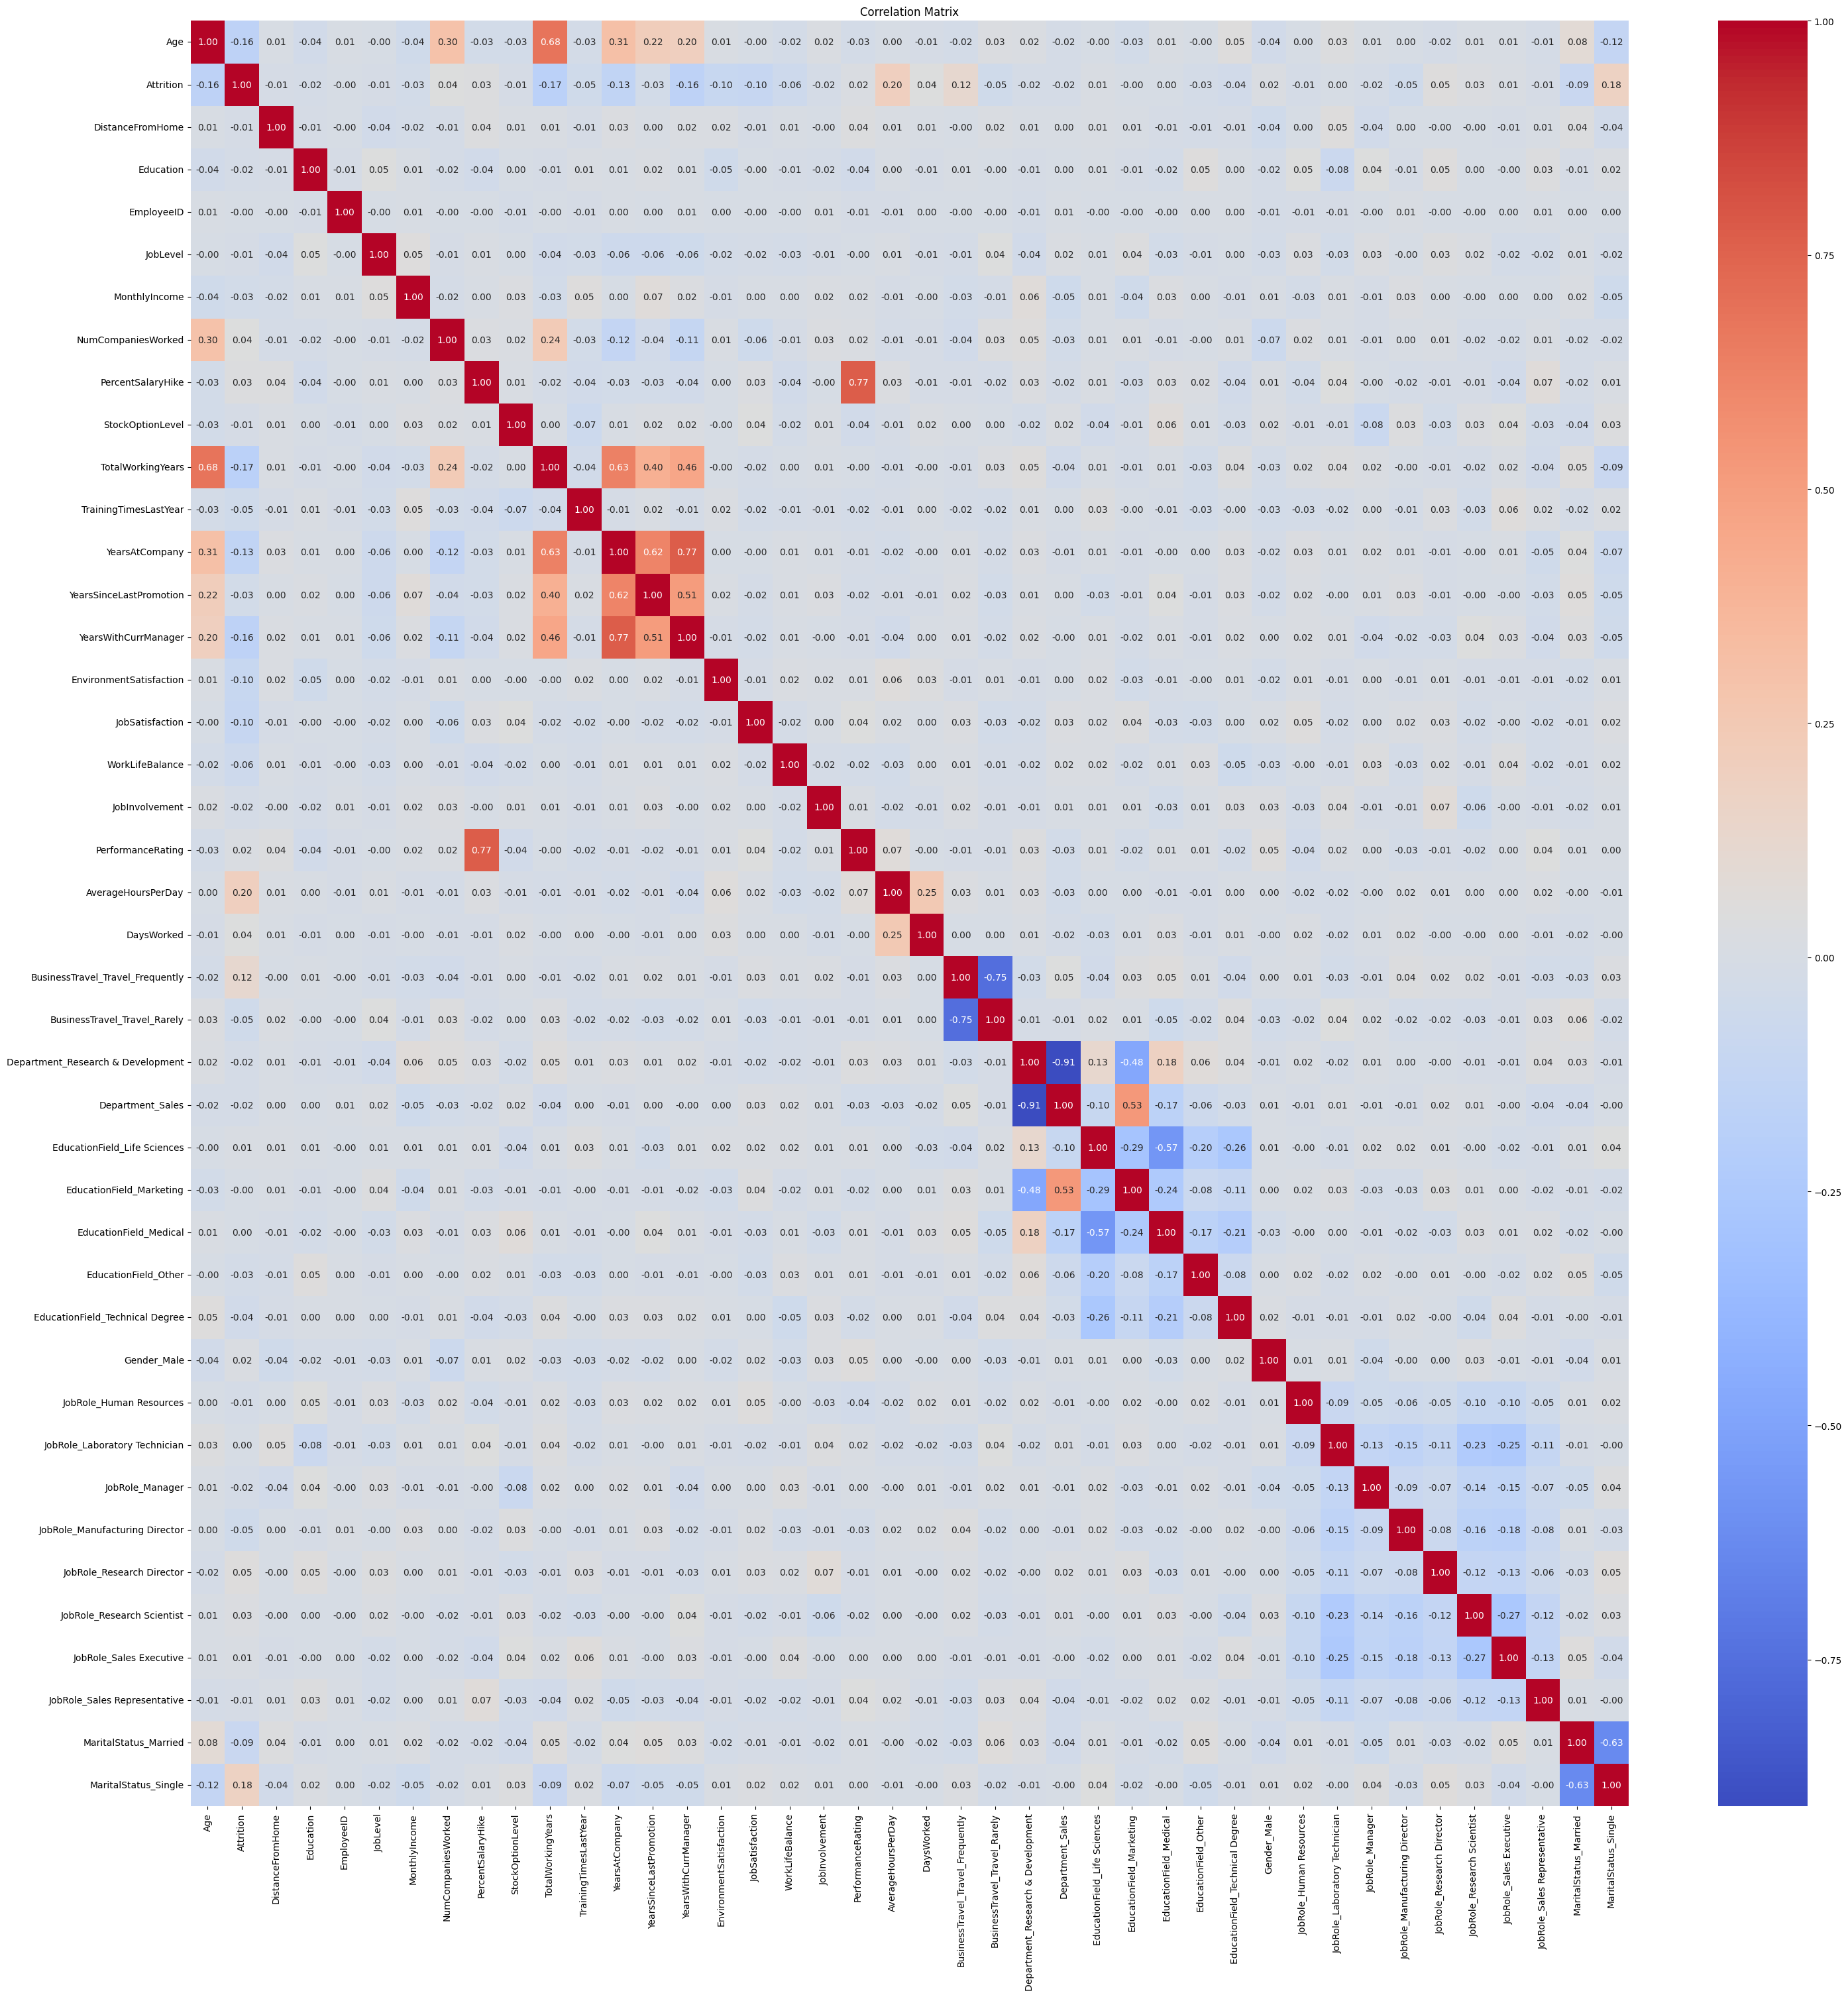

In [17]:
# Display correlation matrix
plt.figure(figsize=(35, 35))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Splitting Data into Training and Testing Sets

1. **Separate Features and Target Variable**:
   - Features (X): All columns except 'Attrition'
   - Target (y): 'Attrition' column

2. **Split the Data**:
   - 80% for training
   - 20% for testing

3. **Check Shape and Class Distribution**:
   - Verify rows and columns for both sets
   - Ensure similar distribution of target classes

In [18]:
# Separate features (X) and target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of each data set and class distribution
pd.DataFrame({
    'Rows': [X_train.shape[0], X_test.shape[0]],
    'Columns': [X_train.shape[1], X_test.shape[1]],
    'Y(0)_ratio': [y_train.value_counts(normalize=True).get(0, 0), y_test.value_counts(normalize=True).get(0, 0)],
    'Y(1)_ratio': [y_train.value_counts(normalize=True).get(1, 0), y_test.value_counts(normalize=True).get(1, 0)]
}, index=['Train', 'Test'])

,Rows,Columns,Y(0)_ratio,Y(1)_ratio
Train,3528,41,0.838435,0.161565
Test,882,41,0.840136,0.159864


## Model Evaluation and Performance Metrics

1. **Model Initialization**:
   - Initialize the following machine learning models:
     - Logistic Regression
     - Random Forest
     - Decision Tree
     - Gradient Boosting

2. **Evaluation Function**:
   - Define a function to evaluate each model based on metrics such as Accuracy, Precision, Recall, F1-Score, and ROC AUC.

3. **Metrics Collection**:
   - Create a dictionary to store performance metrics for each model.
   - Train each model on the training data and evaluate its performance on the testing data.
   - Collect and store metrics for each model.

4. **Performance Summary**:
   - Display the performance metrics for all models in a tabular format using pandas DataFrame.

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=100),
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

# Dictionary to hold the metrics for each model
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC AUC': []}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics_dict['Model'].append(name)
    for metric, value in metrics.items():
        metrics_dict[metric].append(value)

# Get the metrics for all models
metrics_df= pd.DataFrame(metrics_dict)
display(metrics_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.849206,0.576923,0.212766,0.310881,0.746097
1,Random Forest,0.989796,1.000000,0.936170,0.967033,0.999981
2,Decision Tree,0.977324,0.911565,0.950355,0.930556,0.966405
3,Gradient Boosting,0.908163,0.884615,0.489362,0.630137,0.909132
4,MLP Classifier,0.619048,0.173913,0.368794,0.236364,0.539711


### Model Performance Comparison - Combined Feature Importance Analysis

- Random Forest and Decision Tree models exhibit superior accuracy and other metrics compared to alternative models, warranting focus on these for feature importance analysis.
- The combined analysis integrates feature importance from Random Forest and Decision Tree models.
- The table below ranks features based on their mean importance across both models, emphasizing those most influential in predicting attrition.
- Identifying critical features for predicting employee attrition is essential for informed decision-making and targeted interventions.



In [20]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Importance_RF'])
dt_importances = pd.DataFrame(dt_model.feature_importances_, index=X_train.columns, columns=['Importance_DT'])

# Combine importances
combined_importances = rf_importances.join(dt_importances)
combined_importances['Mean Importance'] = combined_importances.mean(axis=1)
combined_importances = combined_importances.sort_values(by='Mean Importance', ascending=False)

# Add cumulative importance
combined_importances['Cumulative Importance'] = combined_importances['Mean Importance'].cumsum()

# Calculate correlation with Attrition
combined_importances['Correlation_with_Attrition'] = data.drop('Attrition', axis=1).apply(lambda x: x.corr(data.Attrition))

# Display top 5 features
print("Top combined feature importances:")
display(combined_importances)

Top combined feature importances:


,Importance_RF,Importance_DT,Mean Importance,Cumulative Importance,Correlation_with_Attrition
AverageHoursPerDay,0.109166,0.124447,0.116806,0.116806,0.201688
TotalWorkingYears,0.069984,0.103885,0.086935,0.203741,-0.171050
Age,0.071272,0.081935,0.076603,0.280344,-0.159205
DistanceFromHome,0.044059,0.079723,0.061891,0.342235,-0.009730
MonthlyIncome,0.064075,0.042693,0.053384,0.395619,-0.031176
EnvironmentSatisfaction,0.036056,0.052715,0.044386,0.440005,-0.101625
NumCompaniesWorked,0.038451,0.047529,0.042990,0.482995,0.043457
TrainingTimesLastYear,0.027883,0.055329,0.041606,0.524601,-0.049431
PercentSalaryHike,0.041917,0.039037,0.040477,0.565078,0.032533
YearsWithCurrManager,0.039410,0.040358,0.039884,0.604962,-0.156199


### Insights on Employee Attrition Factors

Based on the top combined feature importances and their correlation with attrition, here are some insights and suggestions for addressing employee attrition.

#### **Average Hours Per Day**

- **Insight:** Employees who spend more hours per day at work are more likely to experience attrition.
  
- **Suggestions:**
  - Implement policies that promote work-life balance.
  - Ensure reasonable working hours.
  - Provide flexibility where feasible.

#### **Total Working Years**

- **Insight:** Employees with fewer total working years tend to experience higher attrition rates.
  
- **Suggestions:**
  - Offer career development opportunities.
  - Provide mentoring programs.
  - Introduce incentives for long-term commitment.

#### **Age**

- **Insight:** Younger employees tend to leave the company more frequently.
  
- **Suggestions:**
  - Provide clear career progression paths.
  - Offer professional growth and development opportunities.
  - Address and engage younger employees' specific concerns and motivations.

#### **Distance From Home**

- **Insight:** Employees who live farther from their workplace are less likely to consider attrition. However, this correlation is so minimal that it is not practically significant.
  
- **Suggestions:**
  - Consider options like remote work.
  - Provide transportation benefits.
  - Offer housing assistance or relocation support.

#### **Monthly Income**

- **Insight:** Employees with lower monthly income may be more prone to attrition, possibly seeking higher-paying opportunities.
  
- **Suggestions:**
  - Review compensation structures.
  - Offer performance-based bonuses.
  - Ensure pay equity to retain valuable employees.

#### **Environment Satisfaction**

- **Insight:** Employees with lower satisfaction in their work environment are more likely to leave the organization.
  
- **Suggestions:**
  - Improve workplace culture.
  - Address issues proactively.
  - Foster a positive environment to boost satisfaction and reduce turnover.

#### **Number of Companies Worked**

- **Insight:** Employees who have worked at more companies in the past may have higher attrition rates.
  
- **Suggestions:**
  - Offer career growth opportunities internally.
  - Provide incentives for long-term commitment.
  - Understand and address past employment experiences effectively.

#### **Training Times Last Year**

- **Insight:** Employees who received fewer training opportunities last year may feel undervalued or less equipped for career growth.
  
- **Suggestions:**
  - Invest in continuous learning programs.
  - Offer skill development opportunities.
  - Empower employees through regular and effective training initiatives.

## Recommendations for Enhancing Data Collection and Analysis Efficiency

### Standard Procedures for Optimizing Data Processes:

As a data strategist, optimizing our data processes is essential for effectively addressing employee attrition. Key practices include:

- **Automate Data Integration:** Ensure regular updates using automated scripts.
- **Enhance Data Quality Checks:** Implement robust validation procedures for accuracy.
- **Adopt Predictive Analytics:** Utilize historical data to predict attrition risks.
- **Facilitate Cross-functional Collaboration:** Foster alignment between HR, data analytics, and business teams.
- **Monitor Performance Metrics:** Establish KPIs to evaluate strategy effectiveness.
- **Invest in Employee Feedback:** Regularly collect employee insights.

### Specific Recommendations:

For enhancing efficiency in data collection and analysis related to attrition, consider the following targeted recommendations:

- **Standardize Reasons for Leaving:** Encourage employees to select predefined reasons such as personal reasons, relocation, higher education, better job opportunities, or better compensation. This structured approach facilitates standardized data collection, enabling deeper analysis and insights. Include "Other" as a predefined option to capture diverse reasons. Utilize Natural Language Processing (NLP) or machine learning models to analyze "Other" responses, uncovering insights for enhanced retention strategies.

- **Allow employees to provide comments or suggestions:** When indicating their reason for leaving, provide an option for employees to offer additional comments or suggestions. These qualitative insights can provide context and nuance to quantitative data, identifying potential areas for enhancing company policies, culture, or work environment. Employ NLP techniques to analyze these comments, revealing hidden patterns or themes contributing to attrition and guiding targeted interventions and improvements.

Implementing these practices empowers employees to contribute to organizational enhancements while offering actionable insights to effectively boost employee retention strategies.
